## Observations and Insights 

In [139]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview

merge_df.head()
#study_results.head()
#mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [140]:
# Checking the number of mice.

mouse_counts = merge_df["Mouse ID"].value_counts()

len(mouse_counts)



249

In [141]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
### How to see a list of the duplicated items 

duplicate_timepoint = merge_df.duplicated(subset=['Mouse ID', 'Timepoint',])

duplicate_timepoint.value_counts()

duplicate_timepoint

#df.loc[row,column]
merge_df.loc[duplicate_timepoint]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [142]:
### Optional: Get all the data for the duplicate mouse ID. 


#merge_df["Mouse ID"] == "g989" ==> Where in the dataset Mouse ID = g989

merge_df.loc[merge_df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [143]:
### Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merge_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep = 'first')

cleaned_mouse_counts = cleaned_df["Mouse ID"].value_counts()

cleaned_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [144]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_mouse_counts)

249

## Summary Statistics

In [145]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_stat=cleaned_df['Tumor Volume (mm3)'].describe()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grouped_drug = cleaned_df.groupby('Drug Regimen')

summary_grouped_drug= grouped_drug['Tumor Volume (mm3)'].describe()

summary_grouped_drug

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,156.0,52.393463,6.568014,45.000000,47.046068,50.909965,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [146]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

grouped_drug_agg = cleaned_df.groupby('Drug Regimen').agg(['count','min','max','median','mean','std','sem'])

grouped_drug_agg.loc[:,"Tumor Volume (mm3)"] 

,count,min,max,median,mean,std,sem
Drug Regimen,,,,,,,
Capomulin,230,23.343598,48.158209,41.557809,40.675741,4.994774,0.329346
Ceftamin,178,45.000000,68.923185,51.776157,52.591172,6.268188,0.469821
Infubinol,178,36.321346,72.226731,51.820584,52.884795,6.567243,0.492236
Ketapril,188,45.000000,78.567014,53.698743,55.235638,8.279709,0.603860
Naftisol,186,45.000000,76.668817,52.509285,54.331565,8.134708,0.596466
Placebo,181,45.000000,73.212939,52.288934,54.033581,7.821003,0.581331
Propriva,156,45.000000,72.455421,50.909965,52.393463,6.568014,0.525862
Ramicane,228,22.050126,47.622816,40.673236,40.216745,4.846308,0.320955
Stelasyn,181,45.000000,75.123690,52.431737,54.233149,7.710419,0.573111


# Bar and Pie Charts

## My Findings 
 
### HW Findings: When charting with a bar graph pyplot is slightly more efficient for # of lines of code. There was no difference in # of lines of code required when plotting pie charts using pyplot vs. pandas.

In [331]:
grouped_drug_agg.columns

Text(0, 0.5, '# of Measurement')

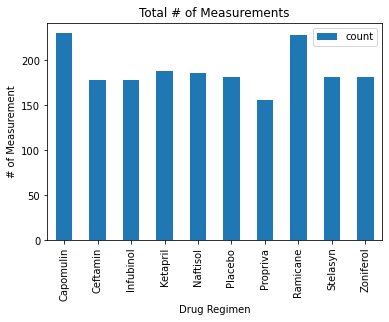

In [347]:
### Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
### Do I need a list of counts and drugs for panda or can I include that in the code..?

#drug_and_counts = summary_grouped_drug[["count"]]

#drug_and_counts.plot(kind = "bar", figsize=(20,3))


measurement_count = grouped_drug['Mouse ID'].count()  #Y

drug_regimen = pd.unique(cleaned_df['Drug Regimen'])  #X



grouped_drug_agg.loc[:, 'Tumor Volume (mm3)'].plot(kind = "bar", y ='count')

plt.title("Total # of Measurements")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Measurement")


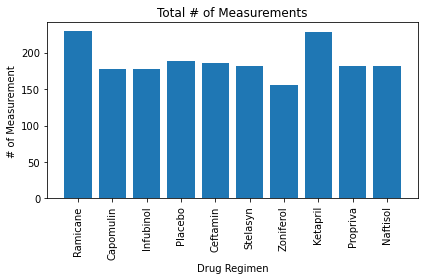

In [339]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

measurement_count = grouped_drug['Mouse ID'].count()

drug_regimen = pd.unique(cleaned_df['Drug Regimen'])


plt.bar(drug_regimen,measurement_count, align ='center')

plt.title("Total # of Measurements")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Measurement")


plt.xticks(rotation=90)

plt.tight_layout()


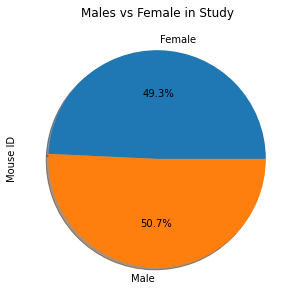

In [342]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

grouped_sex = cleaned_df.groupby('Sex')

grouped_sex_count = grouped_sex['Mouse ID'].count()


plt.title("Males vs Female in Study")

grouped_sex_count.plot(kind = "pie", figsize=(5,5), autopct='%1.1f%%',
        shadow=True, startangle=0)

([<matplotlib.patches.Wedge at 0x281f712cfd0>,
 [Text(-1.099701533132135, 0.025622998006324282, 'Female'),
  Text(1.099701530733132, -0.025623100967813024, 'Male')],
 [Text(-0.5998371998902553, 0.013976180730722335, '49.3%'),
  Text(0.5998371985817083, -0.013976236891534375, '50.7%')])

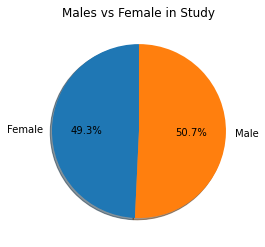

In [341]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# gender_count

grouped_sex = cleaned_df.groupby('Sex')

labels = ['Female', 'Male']
plt.title("Males vs Female in Study")

plt.pie(x = grouped_sex_count, labels = labels, autopct='%1.1f%%',
        shadow=True, startangle=90)



In [326]:
# drug_search = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# top_drugs = cleaned_df[cleaned_df.loc["Drug Regimen"].isin(drug_search)]

# #top_drugs_df = cleaned_df[top_drugs]
# top_drugs.head(75)

# # mouse_id_index = cleaned_df.set_index('Mouse ID')

# # mouse_id_index.head()

# # # df1.join(df2, how='outer')

# # joined_df = max_df.join(mouse_id_index, how="left")

# # joined_df.head()


# #max_timepoints = max_df.loc[:,'Timepoint']

# # capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
# # ramicane_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ramicane", :]
# # infubinol_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Infubinol", :]
# # ceftamin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ceftamin", :]



## Quartiles, Outliers and Boxplots

## My Findings

Tumor Volume Data below: 

The lower quartile of temperatures is: 45.93471217

The upper quartile of temperatures is: 64.95756185

The interquartile range of temperatures is: 19.022849680000007

The the median of temperatures is: 55.84141007 

#### Values below 17.400437649999986 could be outliers.
#### Values above 93.49183637000002 could be outliers.



In [310]:

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
                   

max_mouse_timepoint = cleaned_df.groupby("Mouse ID").max()['Timepoint']
max_mouse_timepoint_df = pd.DataFrame(max_mouse_timepoint)

timepoint_max_merge = pd.merge(max_mouse_timepoint_df, cleaned_df, on=("Mouse ID", "Timepoint"), how="left")

                                            
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

timepoint_max_merge = pd.merge(max_mouse_timepoint_df, cleaned_df, on=("Mouse ID", "Timepoint"), how="left")
timepoint_max_merge = timepoint_max_merge.sort_values(by=("Drug Regimen"))

timepoint_max_drug = timepoint_max_merge.groupby("Drug Regimen")                               


#capomulin_df.head(20)
#max_mouse_timepoint_df

timepoint_max_merge.head(20)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
66,g316,45,Capomulin,Female,22,22,40.159220,2
181,s710,45,Capomulin,Female,1,23,40.728578,1
184,t565,45,Capomulin,Female,20,17,34.455298,0
170,r944,45,Capomulin,Male,12,25,41.581521,2
164,r554,45,Capomulin,Female,8,17,32.377357,3
163,r157,15,Capomulin,Male,22,25,46.539206,0
24,b742,45,Capomulin,Male,7,21,38.939633,0
193,u364,45,Capomulin,Male,18,17,31.023923,3
88,j246,35,Capomulin,Female,21,21,38.753265,1
86,j119,45,Capomulin,Female,7,23,38.125164,1


In [329]:
# Put treatments into a list for for loop (and later for plot labels)
drug_search = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_max = timepoint_max_merge['Tumor Volume (mm3)']

quartiles = tumor_max .quantile([.25,.5,.75])

lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

The lower quartile of temperatures is: 45.93471217
The upper quartile of temperatures is: 64.95756185
The interquartile range of temperatures is: 19.022849680000007
The the median of temperatures is: 55.84141007 
Values below 17.400437649999986 could be outliers.
Values above 93.49183637000002 could be outliers.


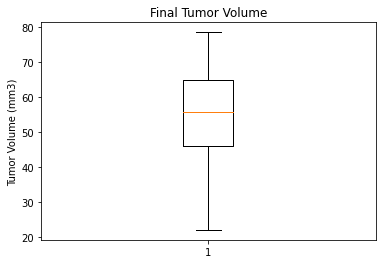

In [324]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_max)
plt.show()


# Line and Scatter Plots

## My Findings

### Plotting an individual’s mouse weight vs. tumor volume does not show any significant statistical information since the mice weights are constant throughout the timeframe.

Text(0, 0.5, ' Tumor Volume (mm3))')

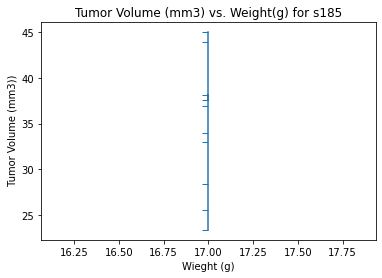

In [252]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_id = "s185"
drug_regimen = "Capomulin"
capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]

mouse_drug_data = capomulin_df.loc[capomulin_df["Mouse ID"] == mouse_id]

mouse_drug_data.head()
#capomulin_df.head(50)

tumor_volume = mouse_drug_data["Tumor Volume (mm3)"] # for y = Tumor Volume (mm3)
weight = mouse_drug_data['Weight (g)']
plt.plot(weight, tumor_volume, marker = 0)

plt.title(f"Tumor Volume (mm3) vs. Weight(g) for {mouse_id}")
plt.xlabel("Wieght (g)")
plt.ylabel(" Tumor Volume (mm3))")


## My Findings 

### A better use of the scatter plot below would of been to plot the mice weight vs average tumor volume. Since the mouse weight did not change over the duration of the data the extra marks are just noise in the graph. 

Text(0, 0.5, ' Tumor Volume (mm3))')

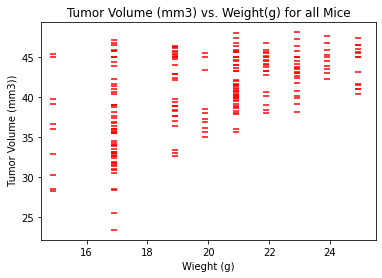

In [207]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

plt.scatter(weight, tumor_volume, marker = 0, facecolor = "red",  edgecolors = "black")

plt.title(f"Tumor Volume (mm3) vs. Weight(g) for all Mice")
plt.xlabel("Wieght (g)")
plt.ylabel(" Tumor Volume (mm3))")

# Correlation and Regression

## My Findings

### The scatter plot shows that there is a postive correlation between the mouse weight and tumor volume... although the mice living with the tumor would not call this correlation very "positive."

### The positive correlation is also proven by the Peason's correlation coefficeint of 0.53 

 r = 0.5256995552077166


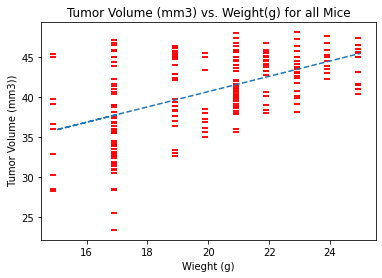

In [204]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

slope, int, r, p, std_err = st.linregress(weight, tumor_volume)

fit = slope * weight + vc_int


plt.scatter(weight, tumor_volume, marker = 0, facecolor = "red",  edgecolors = "black")
tumor_volume = capomulin_df["Tumor Volume (mm3)"] # for y = Tumor Volume (mm3)
weight = capomulin_df['Weight (g)']

plt.scatter(weight, tumor_volume, marker = 0, facecolor = "red",  edgecolors = "black")
plt.plot(weight,fit,"--")

plt.title(f"Tumor Volume (mm3) vs. Weight(g) for all Mice")
plt.xlabel("Wieght (g)")
plt.ylabel(" Tumor Volume (mm3))")
plt.title(f"Tumor Volume (mm3) vs. Weight(g) for all Mice")
plt.xlabel("Wieght (g)")
plt.ylabel(" Tumor Volume (mm3))")

print(f" r = {r}")
